# Simple Liner Regression ANN

In [57]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import History
print(tf.__version__)

2.11.0


In [58]:
def eval_plot(_history, xy=[], titel=None):
    """ Plots the model history evaluation

    :param _history (pandas): Includes the evaluation data
    :param xy (list): Includes the name of the x and y features
    :param titel (str): The plot name
    """
    plt.plot(_history.history[xy[0]])
    plt.plot(_history.history[xy[1]])
    plt.title(titel)
    plt.ylabel(xy[0])
    plt.xlabel(xy[1])
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

## Generate data

In [59]:
ds_size = 1500
# generate random x , y values in the range -8 to +8
x = np.random.uniform(low=-8, high=8, size=(ds_size, 1))
y = np.random.uniform(-8, 8, size=(ds_size, 1))

# Add noise Gaussian to data data
noise = np.random.uniform(low=-1, high=1, size=(ds_size, 1))
z = 3 * x + 2.5 * y + 2 + noise

# Build Input Features
input = np.column_stack((x, y))
input[:5, :].round(2)

array([[-7.11, -1.86],
       [-7.17,  7.75],
       [-5.85, -7.16],
       [ 4.26, -2.99],
       [ 6.16, -1.27]])

## Create a Keras sequential model
It consists of single layer with a single neuron.

In [60]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1)])

Compile the model with the  specified optimizer, loss function and error metrics.

In [61]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mse'])

Setup History module to record loss and accuracy on each  epoch during training

In [62]:
history = History()

Fit the model

In [64]:
model.fit(input, z, epochs=8, verbose=1, validation_split=0.2, callbacks=[history])

Epoch 1/8
38/38 [==============================] - 0s 9ms/step - loss: 0.3398 - mse: 0.3398 - val_loss: 0.3325 - val_mse: 0.3325
Epoch 2/8
38/38 [==============================] - 0s 5ms/step - loss: 0.3367 - mse: 0.3367 - val_loss: 0.3377 - val_mse: 0.3377
Epoch 3/8
38/38 [==============================] - 0s 6ms/step - loss: 0.3394 - mse: 0.3394 - val_loss: 0.3523 - val_mse: 0.3523
Epoch 4/8
38/38 [==============================] - 0s 5ms/step - loss: 0.3393 - mse: 0.3393 - val_loss: 0.3512 - val_mse: 0.3512
Epoch 5/8
38/38 [==============================] - 0s 5ms/step - loss: 0.3376 - mse: 0.3376 - val_loss: 0.3341 - val_mse: 0.3341
Epoch 6/8
38/38 [==============================] - 0s 7ms/step - loss: 0.3415 - mse: 0.3415 - val_loss: 0.3348 - val_mse: 0.3348
Epoch 7/8
38/38 [==============================] - 0s 7ms/step - loss: 0.3371 - mse: 0.3371 - val_loss: 0.3308 - val_mse: 0.3308
Epoch 8/8
38/38 [==============================] - 0s 7ms/step - loss: 0.3398 - mse: 0.3398 - val

Plot the Loss and MSE metric on both training and validation datasets.

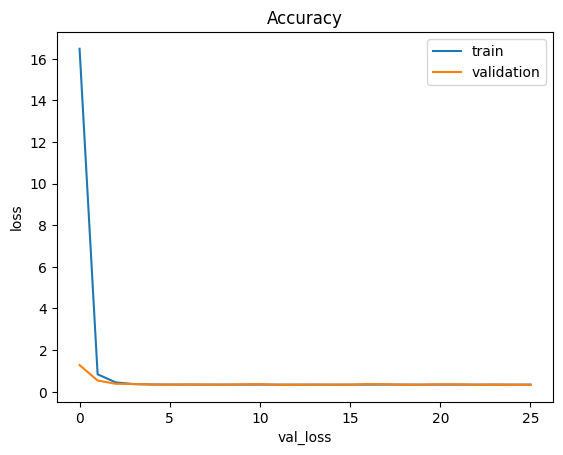

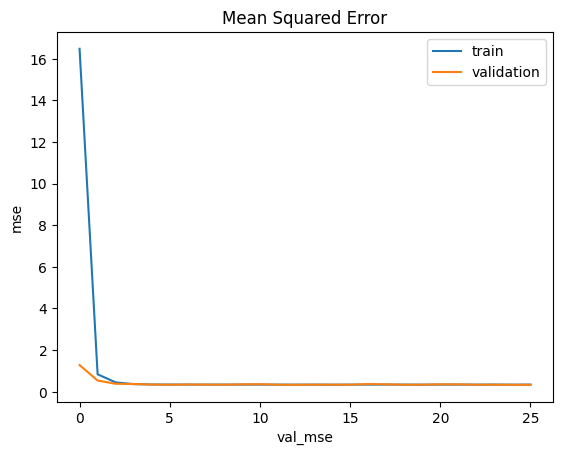

In [65]:
eval_plot(history, ['loss', 'val_loss'], 'Accuracy')
eval_plot(history, ['mse', 'val_mse'], 'Mean Squared Error')

## Predicted vs. Original Output Values

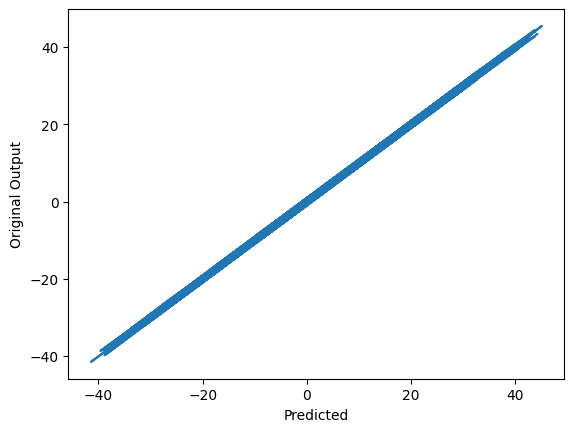

In [66]:
plt.plot(np.squeeze(model.predict_on_batch(input)),
         np.squeeze(z))
plt.xlabel('Predicted')
plt.ylabel('Original Output')
plt.show()

## Predicting

In [67]:
# Checking from equation
# z = 3 * x + 2.5 * y + 2 + noise
test_value = [2, 3]
print("For x={}, y={} Predicted z = {:2f}, vs 3 * x + 2.5 * y + 2 = {}".format(test_value[0],
                                                                                      test_value[1],
                                                                                      model.predict([test_value]).flatten()[0],
                                                                                      3 * test_value[0] + 2.5 * test_value[1] + 2))

1/1 [==============================] - 0s 136ms/step
For x=2, y=3 Predicted z = 15.529337, vs 3 * x + 2.5 * y + 2 = 15.5
